<a href="https://colab.research.google.com/github/aarsh121/Financial-Analysis-using-Python/blob/main/Prediction_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import os
import pandas as pd
import yfinance as yf
from datetime import datetime
import time

In [ ]:
# Using yahoo finance to fetch the bitcoin data

btc_ticker=yf.Ticker('BTC-USD')
btc=btc_ticker.history(period='max')

In [ ]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-13 00:00:00+00:00,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.0,0.0
2024-08-14 00:00:00+00:00,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.0,0.0
2024-08-15 00:00:00+00:00,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,0.0,0.0


In [ ]:
#Deleting the unnecessary columns
btc.drop(['Dividends', 'Stock Splits'],axis=1, inplace=True)

In [ ]:
btc.index=pd.to_datetime(btc.index)

In [ ]:
btc.index = btc.index.date

In [ ]:
btc

,Open,High,Low,Close,Volume
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440
2024-08-16,57560.273438,59847.359375,57110.019531,58894.105469,29350938673


In [ ]:
#changing column name to lower case
btc.columns=[c.lower() for c in btc.columns]

<Axes: >

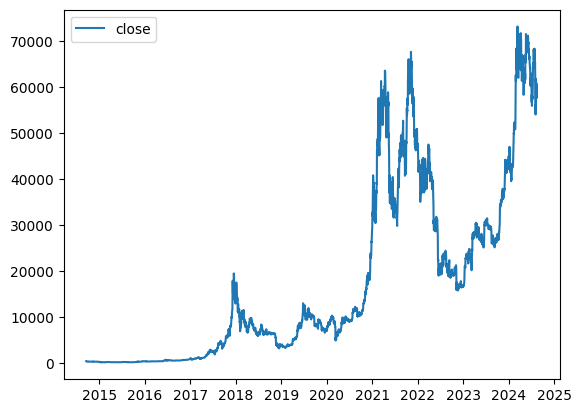

In [ ]:
btc.plot.line(y='close', use_index=True)

As we can see we should have buy the Bitcoin in 2020, after that it exploded. BIG LOSS who didn't buy
.

In [ ]:
# Reading wiki sentiment file

wiki=pd.read_csv('/content/wikipedia_edits.csv', index_col=0, parse_dates=True)
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.0,0.000000,0.000000
2009-04-07,0.0,0.000000,0.000000
2009-04-08,0.0,0.000000,0.000000
2009-04-09,0.0,0.000000,0.000000
2009-04-10,0.0,0.000000,0.000000
...,...,...,...
2024-08-13,0.0,0.000000,0.000000
2024-08-14,0.0,0.000000,0.000000
2024-08-15,596.4,-0.012672,0.022755
2024-08-16,596.4,-0.012672,0.022755


In [ ]:
#Merge both data set on the index column
btc=btc.merge(wiki, left_index=True, right_index=True)

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.000000,0.000000
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.000000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.000000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.000000,0.000000
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.0,0.000000,0.000000
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.0,0.000000,0.000000
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,596.4,-0.012672,0.022755
2024-08-16,57560.273438,59847.359375,57110.019531,58894.105469,29350938673,596.4,-0.012672,0.022755


In [ ]:
#create new column - tommorow which will have the next day closing value
btc['tommorow']=btc['close'].shift(-1)

In [ ]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.000000,0.000000,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.000000,0.000000,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.000000,0.000000,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.000000,0.000000,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.000000,0.000000,402.152008
...,...,...,...,...,...,...,...,...,...
2024-08-13,59356.207031,61572.398438,58506.253906,60609.566406,30327698167,0.0,0.000000,0.000000,58737.269531
2024-08-14,60611.050781,61687.757812,58472.875000,58737.269531,29961696180,0.0,0.000000,0.000000,57560.097656
2024-08-15,58733.261719,59838.648438,56161.593750,57560.097656,35682112440,596.4,-0.012672,0.022755,58894.105469
2024-08-16,57560.273438,59847.359375,57110.019531,58894.105469,29350938673,596.4,-0.012672,0.022755,59161.660156


In [ ]:
#define target column if tmrw>close then 1 else 0.
btc['target']=(btc['tommorow']> btc['close']).astype(int)


In [ ]:
# we can see below that our data is symmetric, A balanced data set
btc['target'].value_counts()

,count
target,
1,1914
0,1709


In [ ]:
#Uisng Random Forest Classifier as our model

from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train=btc.iloc[:-200]
test=btc.iloc[-200:]

predictors=['close','open', 'volume', 'high', 'low', 'edit_count', 'neg_sentiment', 'sentiment']
model.fit(train[predictors], train['target'])


RandomForestClassifier(min_samples_split=50, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds=model.predict(test[predictors])
preds= pd.Series(preds, index=test.index)
precision_score(test['target'], preds)


0.6470588235294118

**We can see that our base line model is giving the accuracy of 64%. Lets see if hyper parameter tuning can increase the precision score.**

In [ ]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train['target'])
  preds=model.predict(test[predictors])
  preds= pd.Series(preds, index=test.index, name='predictions')
  combined =pd.concat([test['target'], preds], axis=1)
  return combined


In [ ]:
def backtest(data, model, predictors, start=1095, step=150): #here 1095 means using 3 year data to predict the 150 days of data
  all_predictions=[]

  for i in range(start, data.shape[0], step):
    train=data.iloc[0:i].copy()
    test=data.iloc[i:(i+step)].copy()
    predictions=predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)


In [ ]:
from xgboost import XGBClassifier

model=XGBClassifier(random_state=1, learning_rate=.05, n_estimators=200)
predictions=backtest(btc, model, predictors)

In [ ]:
precision_score(predictions['target'], predictions['predictions'])

0.5101918465227818

**We can see that our accuracy drops to 51%. lets try prediction with another set of predictiors.**

In [ ]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return btc, new_predictors

In [ ]:
btc, new_predictors = compute_rolling(btc.copy())

In [ ]:
predictions = backtest(btc, model, new_predictors)

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

0.5210696920583469

In [ ]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2024-08-13,0,0
2024-08-14,0,0
2024-08-15,1,1
2024-08-16,1,0


In [ ]:
btc.to_csv('BTC.csv')